**Importing Libraries**

In [2]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings 

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

**Reading Csv File**

In [3]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\Task_1_Stocks_dataset.csv")

**BASIC CHECKS**

In [4]:
data.shape

(1258, 14)

In [5]:
data.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [6]:
data[data.duplicated()]

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor


In [7]:
data.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


**Selecting new dataframe from existing dataframe that includes important features**

In [10]:
df=data.iloc[:,[1,2,5]]
df['date']=pd.to_datetime(df['date'])

In [11]:
df['date']=df['date'].dt.date
df.set_index('date',drop=True,inplace=True)

In [12]:
df.head()

,close,open
date,,
2016-06-14,718.27,716.48
2016-06-15,718.92,719.00
2016-06-16,710.36,714.91
2016-06-17,691.72,708.65
2016-06-20,693.71,698.77


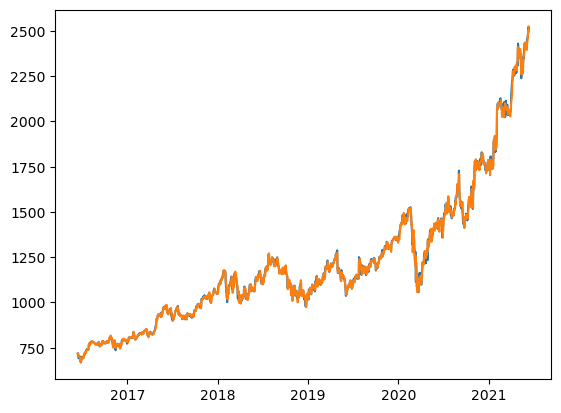

In [13]:
plt.plot(df)

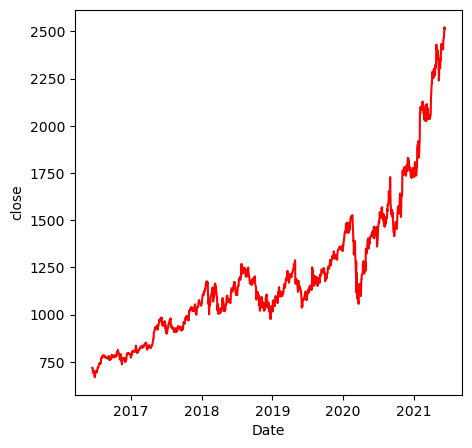

In [14]:
plt.figure(figsize=(5,5))
plt.plot(df['close'],color='red')
plt.xlabel('Date')
plt.ylabel('close')
plt.show()

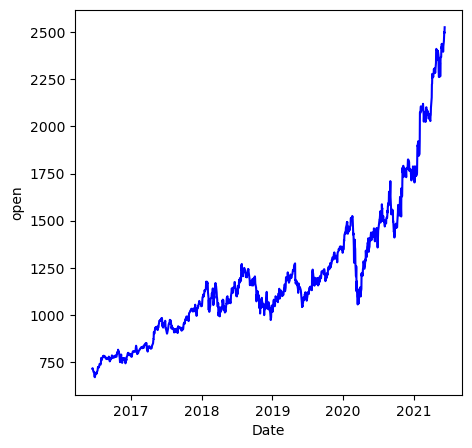

In [15]:
plt.figure(figsize=(5,5))
plt.plot(df['open'],color='blue')
plt.xlabel('Date')
plt.ylabel('open')
plt.show()

**Scaling the features with MinMaxScaler as LSTM are sensitive**

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

**splitting the data into train and test**

In [18]:
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0]
    return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
X_train.shape,y_train.shape,X_test.shape,ytest.shape

((1534, 100), (1534,), (780, 100), (780,))

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

**Creating a Stacked LSTM model**

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Model Fitting**

In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 11s 211ms/step - loss: 0.0066 - val_loss: 0.0152
Epoch 2/100
24/24 [==============================] - 4s 156ms/step - loss: 7.9231e-04 - val_loss: 0.0036
Epoch 3/100
24/24 [==============================] - 4s 148ms/step - loss: 2.9046e-04 - val_loss: 0.0036
Epoch 4/100
24/24 [==============================] - 4s 148ms/step - loss: 2.5686e-04 - val_loss: 0.0024
Epoch 5/100
24/24 [==============================] - 4s 149ms/step - loss: 2.5135e-04 - val_loss: 0.0030
Epoch 6/100
24/24 [==============================] - 4s 147ms/step - loss: 2.4046e-04 - val_loss: 0.0023
Epoch 7/100
24/24 [==============================] - 3s 146ms/step - loss: 2.3781e-04 - val_loss: 0.0040
Epoch 8/100
24/24 [==============================] - 3s 145ms/step - loss: 2.3758e-04 - val_loss: 0.0030
Epoch 9/100
24/24 [==============================] - 4s 147ms/step - loss: 2.4013e-04 - val_loss: 0.0041
Epoch 10/100
24/24 [==============================] - 4s 1

Epoch 78/100
24/24 [==============================] - 3s 144ms/step - loss: 6.2081e-05 - val_loss: 0.0011
Epoch 79/100
24/24 [==============================] - 3s 143ms/step - loss: 6.0127e-05 - val_loss: 0.0010
Epoch 80/100
24/24 [==============================] - 3s 143ms/step - loss: 6.1691e-05 - val_loss: 0.0012
Epoch 81/100
24/24 [==============================] - 3s 145ms/step - loss: 6.0650e-05 - val_loss: 7.5125e-04
Epoch 82/100
24/24 [==============================] - 3s 143ms/step - loss: 5.9794e-05 - val_loss: 0.0014
Epoch 83/100
24/24 [==============================] - 3s 141ms/step - loss: 6.4725e-05 - val_loss: 0.0015
Epoch 84/100
24/24 [==============================] - 3s 143ms/step - loss: 5.7794e-05 - val_loss: 5.9678e-04
Epoch 85/100
24/24 [==============================] - 3s 143ms/step - loss: 5.6606e-05 - val_loss: 7.1487e-04
Epoch 86/100
24/24 [==============================] - 3s 145ms/step - loss: 6.3622e-05 - val_loss: 4.4223e-04
Epoch 87/100
24/24 [==========

**predicting the values**

In [30]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

25/25 [==============================] - 1s 30ms/step


In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

**Model Evaluation**

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1026.8230155612428

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1648.3107452890893

**plotting the data**

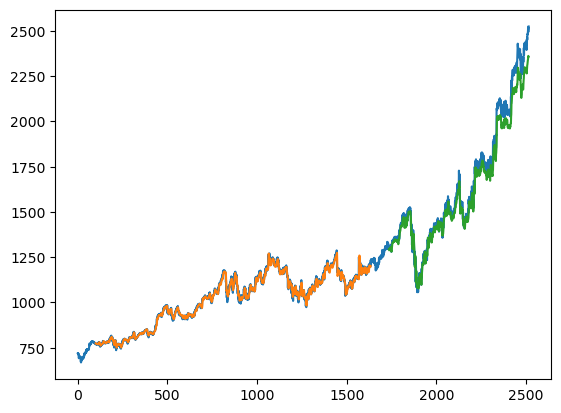

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**Prediction of next 10 days**

In [38]:
x_input=test_data[781:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9143407]
101
1 day input [0.77003329 0.83875885 0.79965099 0.83832797 0.83711611 0.8517553
 0.83907124 0.86024366 0.86698696 0.87125268 0.85553629 0.85450756
 0.86067993 0.8612293  0.85810542 0.85453449 0.86547887 0.8770588
 0.86645913 0.87765127 0.88047354 0.88015038 0.87453815 0.87542684
 0.8831073  0.87524372 0.87091336 0.8615794  0.8752114  0.88709834
 0.86995465 0.89325994 0.88959206 0.88269258 0.89824739 0.92189739
 0.9365662  0.94881669 0.93828165 0.93816854 0.93513621 0.93011645
 0.93418289 0.90807687 0.91641981 0.90941799 0.91570885 0.92267297
 0.90613252 0.93201232 0.93271789 0.90129588 0.91919361 0.88357588
 0.87447352 0.84604613 0.85823468 0.85837472 0.85790075 0.88756154
 0.87445736 0.89038919 0.8838775  0.88070514 0.89873515 0.88354895
 0.85968352 0.9090679  0.89396012 0.90314866 0.91440005 0.93631036
 0.91494404 0.93760301 0.94348992 0.9507772  0.93963084 0.93406978
 0.95261383 0.93894413 0.94454558 0.9487736  0.94456713 0.94417933
 0.95173591 0.93520084 0.93003566 0.

8 day output [[0.5236943]]
9 day input [0.86698696 0.87125268 0.85553629 0.85450756 0.86067993 0.8612293
 0.85810542 0.85453449 0.86547887 0.8770588  0.86645913 0.87765127
 0.88047354 0.88015038 0.87453815 0.87542684 0.8831073  0.87524372
 0.87091336 0.8615794  0.8752114  0.88709834 0.86995465 0.89325994
 0.88959206 0.88269258 0.89824739 0.92189739 0.9365662  0.94881669
 0.93828165 0.93816854 0.93513621 0.93011645 0.93418289 0.90807687
 0.91641981 0.90941799 0.91570885 0.92267297 0.90613252 0.93201232
 0.93271789 0.90129588 0.91919361 0.88357588 0.87447352 0.84604613
 0.85823468 0.85837472 0.85790075 0.88756154 0.87445736 0.89038919
 0.8838775  0.88070514 0.89873515 0.88354895 0.85968352 0.9090679
 0.89396012 0.90314866 0.91440005 0.93631036 0.91494404 0.93760301
 0.94348992 0.9507772  0.93963084 0.93406978 0.95261383 0.93894413
 0.94454558 0.9487736  0.94456713 0.94417933 0.95173591 0.93520084
 0.93003566 0.96059591 0.9448472  0.96831407 0.96035892 0.97734103
 0.97575216 0.98194608 0.

16 day output [[0.3013469]]
17 day input [0.86547887 0.8770588  0.86645913 0.87765127 0.88047354 0.88015038
 0.87453815 0.87542684 0.8831073  0.87524372 0.87091336 0.8615794
 0.8752114  0.88709834 0.86995465 0.89325994 0.88959206 0.88269258
 0.89824739 0.92189739 0.9365662  0.94881669 0.93828165 0.93816854
 0.93513621 0.93011645 0.93418289 0.90807687 0.91641981 0.90941799
 0.91570885 0.92267297 0.90613252 0.93201232 0.93271789 0.90129588
 0.91919361 0.88357588 0.87447352 0.84604613 0.85823468 0.85837472
 0.85790075 0.88756154 0.87445736 0.89038919 0.8838775  0.88070514
 0.89873515 0.88354895 0.85968352 0.9090679  0.89396012 0.90314866
 0.91440005 0.93631036 0.91494404 0.93760301 0.94348992 0.9507772
 0.93963084 0.93406978 0.95261383 0.93894413 0.94454558 0.9487736
 0.94456713 0.94417933 0.95173591 0.93520084 0.93003566 0.96059591
 0.9448472  0.96831407 0.96035892 0.97734103 0.97575216 0.98194608
 0.98630875 0.99821184 0.98335183 0.99408077 1.         0.91434067
 0.87685937 0.82021219 0

24 day output [[0.29056907]]
25 day input [0.8831073  0.87524372 0.87091336 0.8615794  0.8752114  0.88709834
 0.86995465 0.89325994 0.88959206 0.88269258 0.89824739 0.92189739
 0.9365662  0.94881669 0.93828165 0.93816854 0.93513621 0.93011645
 0.93418289 0.90807687 0.91641981 0.90941799 0.91570885 0.92267297
 0.90613252 0.93201232 0.93271789 0.90129588 0.91919361 0.88357588
 0.87447352 0.84604613 0.85823468 0.85837472 0.85790075 0.88756154
 0.87445736 0.89038919 0.8838775  0.88070514 0.89873515 0.88354895
 0.85968352 0.9090679  0.89396012 0.90314866 0.91440005 0.93631036
 0.91494404 0.93760301 0.94348992 0.9507772  0.93963084 0.93406978
 0.95261383 0.93894413 0.94454558 0.9487736  0.94456713 0.94417933
 0.95173591 0.93520084 0.93003566 0.96059591 0.9448472  0.96831407
 0.96035892 0.97734103 0.97575216 0.98194608 0.98630875 0.99821184
 0.98335183 0.99408077 1.         0.91434067 0.87685937 0.82021219
 0.76294696 0.71005255 0.66040856 0.61278671 0.56708527 0.52369428
 0.48302996 0.445470

In [53]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [54]:
len(df)

2516

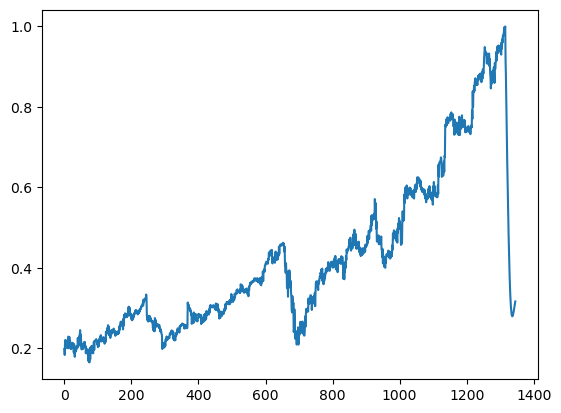

In [57]:
df3=df.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [58]:
df3=scaler.inverse_transform(df3).tolist()

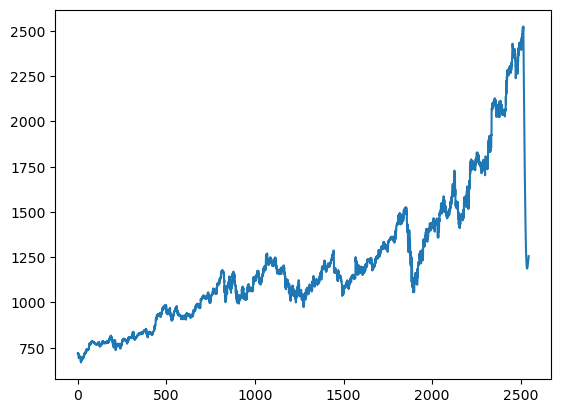

In [59]:
plt.plot(df3)